In [1]:
import requests
from PIL import Image
from io import BytesIO

In [2]:
def download_img(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [3]:
im1 = download_img("https://images.pexels.com/photos/719396/pexels-photo-719396.jpeg?cs=srgb&dl=pexels-gabriel-peter-719396.jpg&fm=jpg") # r is for raw string
im1.save('image.png')

In [22]:
im2 = Image.open(r"F:\Wallpaper\a2fe21da9ce7d1698f5b48cdb506c853.jpg") # r is for raw string
im2.save('image2.png')

In [5]:
im3 = Image.open(r"F:\Wallpaper\notebook-natural-laptop-macbook.jpg") # r is for raw string
im3.save('image4.png')

In [ ]:
im1

In [ ]:
im2

In [8]:
im1.size

(1728, 2592)

In [9]:
im2.size

(500, 700)

In [10]:
im1.show()

In [11]:
im2.show()

In [12]:
im1.info

In [13]:
im2.info

In [14]:
im1.mode # RGB

In [15]:
im1.mode # RGB

In [ ]:
# resize image
im1.resize((200,200))

In [17]:
im1.resize((3* im1.width, 3* im1.height))

In [18]:
im2.resize((3* im1.width, 3* im1.height))

In [6]:
im2.resize(( im2.width//3, im2.height//3)).save('image3.png')

In [23]:
from PIL import ImageDraw, ImageFont

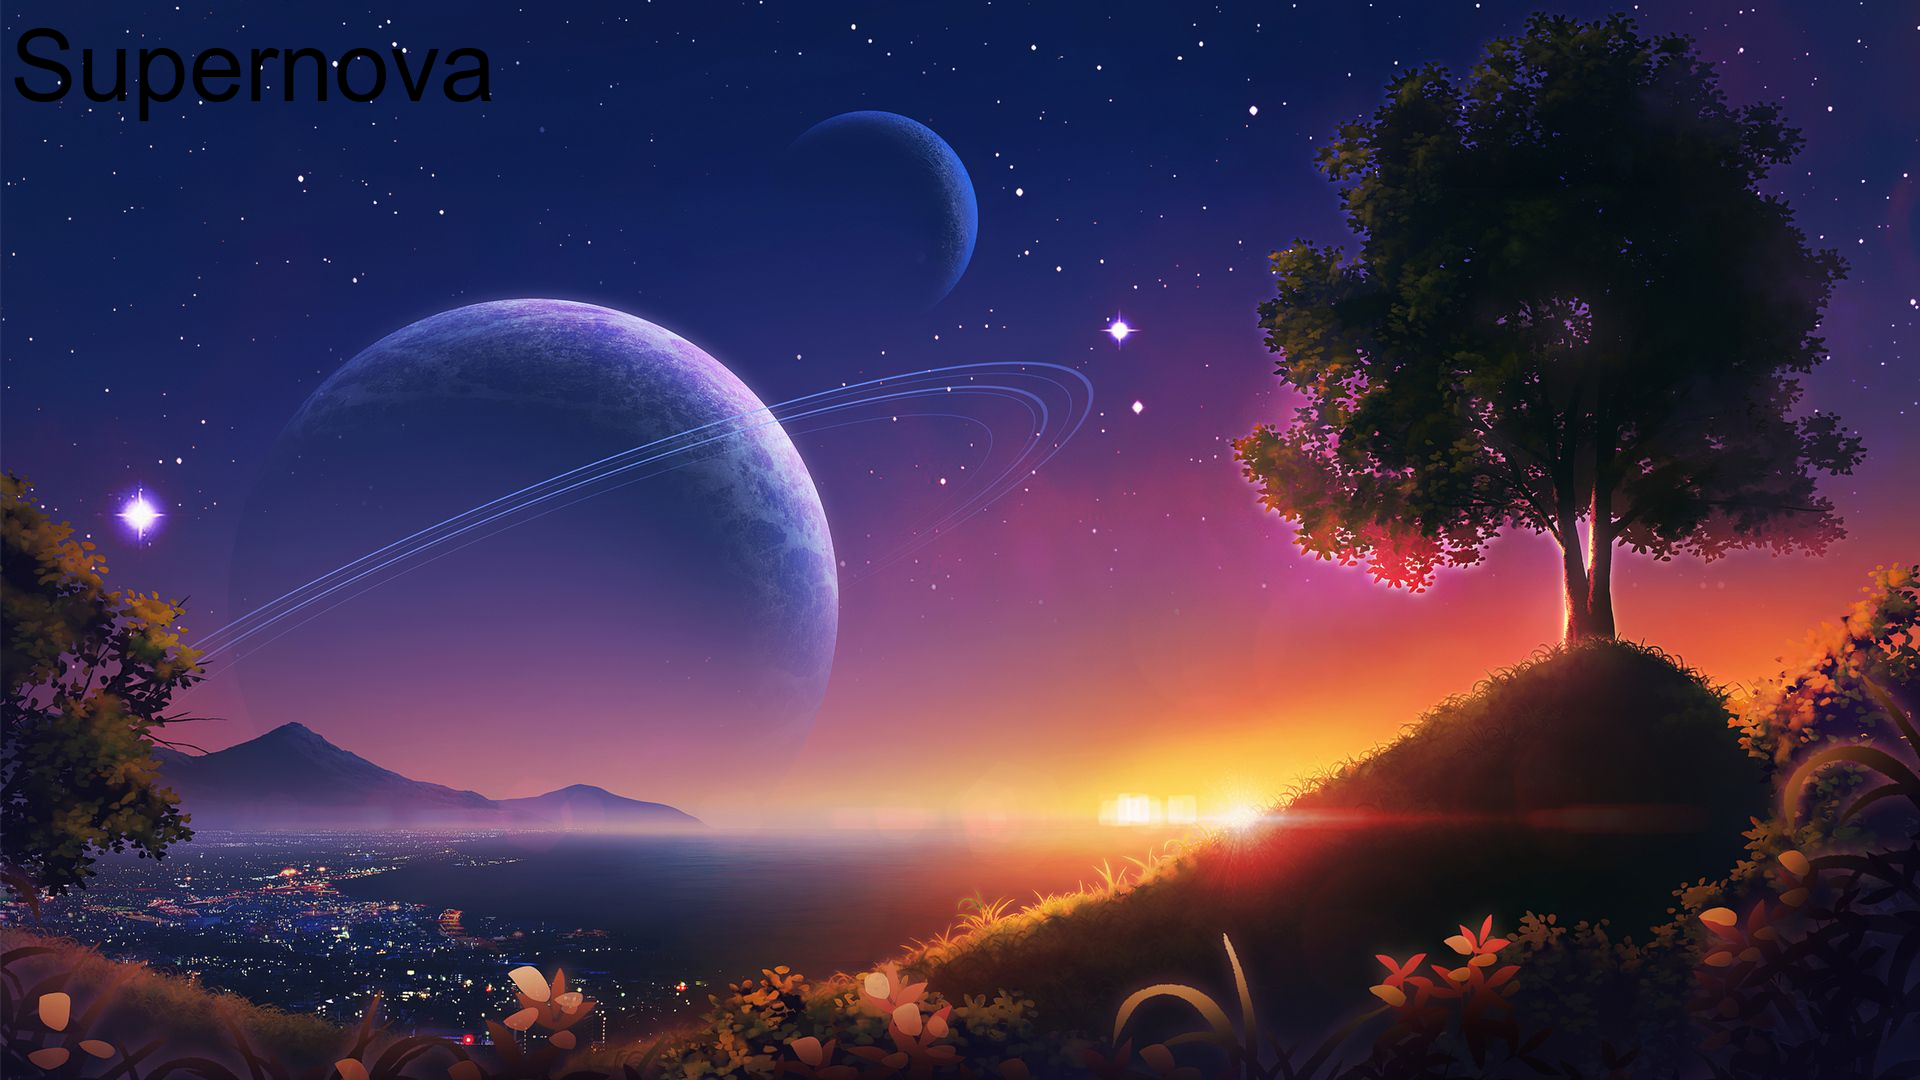

In [24]:
drawIm2 = ImageDraw.Draw(im2)
drawIm2.text((10,10), 'Supernova', fill='black', font = ImageFont.truetype('arial.ttf', 100))
im2

In [22]:
im2.show()

In [ ]:
im1.rotate(90)

In [30]:
im1.rotate(30, expand=True, fillcolor='white').save('Drop.png')

In [ ]:
# Image Flip
im1.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
# if you are getting error than use this
# im1.transpose(Image.FLIP_LEFT_RIGHT)

In [ ]:
im1.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

In [34]:
sky = download_img('https://images.theconversation.com/files/393210/original/file-20210401-13-z6rl6z.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1200&h=900.0&fit=crop')
sky.save('cloud.png')

In [35]:
night = download_img('https://www.gktoday.in/wp-content/uploads/2022/09/AZ_AZ160526_D300-scaled-1.jpg')
night.save('night.png')

In [ ]:
print("sky image resolution: ", sky.size)
print('sky format:', sky.format)
print("night image resolution: ", night.size)
print('night format:', night.format)

In [40]:
def blend_image(image_1, image_2, mode='RGB', size=(100,100), alpha=0.5):
    image_1 = image_1.resize(size)
    image_2 = image_2.resize(size)
    image_1 = image_1.convert(mode)
    image_2 = image_2.convert(mode)
    image_1 = image_1.convert('RGBA')
    image_2 = image_2.convert('RGBA')
    blended_image = Image.blend(image_1, image_2, alpha)
    return blended_image

In [42]:
blend_image(sky, night, alpha=0.5, size=(1000,1000)).show()

In [44]:
blend_image(sky, night, alpha=0.5, size=(1000,1000)).save('daynight.png')

In [43]:
blend_image(im2, im1, alpha=0.5, size=(1000,1000)).show()

In [46]:
icon = Image.open(r'C:\Users\AMAN VERMA\Documents\Web Tech\Html\Framework1\LBSlogo.png')

In [ ]:
icon.size

In [49]:
im1 = im1.convert('RGBA')
im1.paste(icon, (0,0)) 
im1.show()

In [51]:
im1.paste(icon, (200,200))
im1.show()

In [57]:
def add_watermark(image, watermark, style=None, pos=(0,0)):
    image = image.convert('RGBA') # convert image to RGBA
    # reduce alpha of watermark
    watermark = watermark.convert('RGBA') # convert watermark to RGBA
    if style == 'tile':
        for x in range(0, image.width, watermark.width):
            for y in range(0, image.height, watermark.height):
                image.paste(watermark, (x,y), mask = watermark)
    elif style is None:
        if image.width > image.height:
            w = image.width // 4
            h = image.height //4
        else:
            w = image.width // 4
            h = image.height //4
        watermark = watermark.resize((w,h))
        image.paste(watermark, pos, mask=watermark)
    return image    

In [58]:
add_watermark(night, icon, style='tile').show()

In [59]:
add_watermark(sky, icon, pos=(50,100)).show()

In [67]:
add_watermark(sky, icon, pos=(im1.width//4, im1.height//4)).show()

In [ ]:
im1.height

In [70]:
from PIL import ImageFilter # to import the image filter

In [73]:
filters = [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR,
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.EMBOSS,
    ImageFilter.FIND_EDGES,
    ImageFilter.SMOOTH,
    ImageFilter.MaxFilter(3),
    ImageFilter.MinFilter(3),
    ImageFilter.MedianFilter(3),
    ImageFilter.GaussianBlur(10),
    ImageFilter.ModeFilter(3),
    ImageFilter.RankFilter(3, 3)
]

for filter in filters:
    night.filter(filter).show()

In [ ]:
filters = [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR,
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.EMBOSS,
    ImageFilter.FIND_EDGES,
    ImageFilter.SMOOTH,
    ImageFilter.MaxFilter(3),
    ImageFilter.MinFilter(3),
    ImageFilter.MedianFilter(3),
    ImageFilter.GaussianBlur(10),
    ImageFilter.ModeFilter(3),
    ImageFilter.RankFilter(3, 3)
]

for i, filter in enumerate(filters):
    sky.filter(filter).save(f'sky_{i}.png')